In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import numpy as np
import torch

import data
import model

In [2]:
def train(model, num_epochs):
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    
    losses = []
    for epoch in trange(num_epochs):
        for images, labels in tqdm(data.train_loader):
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
    return np.array(losses)

In [3]:
print('training standard model...')
standard_losses = train(model.standard, 8)

training standard model...


In [4]:
print('training equivariant model...')
equivariant_losses = train(model.equivariant, 8)

training equivariant model...


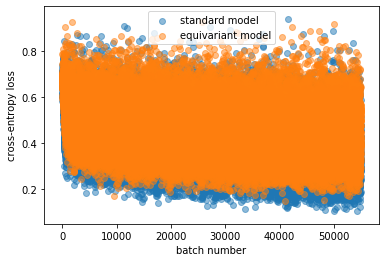

In [11]:
batch_numbers = np.arange(len(standard_losses))
plt.scatter(batch_numbers, standard_losses, label='standard model', alpha=.5)
plt.scatter(batch_numbers, equivariant_losses, label='equivariant model', alpha=.5)
plt.legend()
plt.xlabel('batch number')
plt.ylabel('cross-entropy loss')
plt.show()

In [12]:
torch.save(model.standard.state_dict(), 'model/standard.pth')
torch.save(model.equivariant.state_dict(), 'model/equivariant.pth')